In [1]:
!pip install segmentation-models-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 5.1 MB/s eta 0:00:00


In [4]:
import torch
import segmentation_models_pytorch as smp

num_classes = 14
device = "cuda" if torch.cuda.is_available() else "cpu"

# Define U-Net
model_Seg = smp.Unet(
    encoder_name="resnet34",
    encoder_weights="imagenet",
    in_channels=3,
    classes=num_classes
)

# Load your trained weights
model_Seg.load_state_dict(torch.load("/content/drive/MyDrive/Modified_With_Lossfunctions.pth", map_location=device))
model_Seg.to(device)
model_Seg .eval()



Unet(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

Found 8 images.
 Saved mask for img5.jpg at /content/masks/img5_mask.png


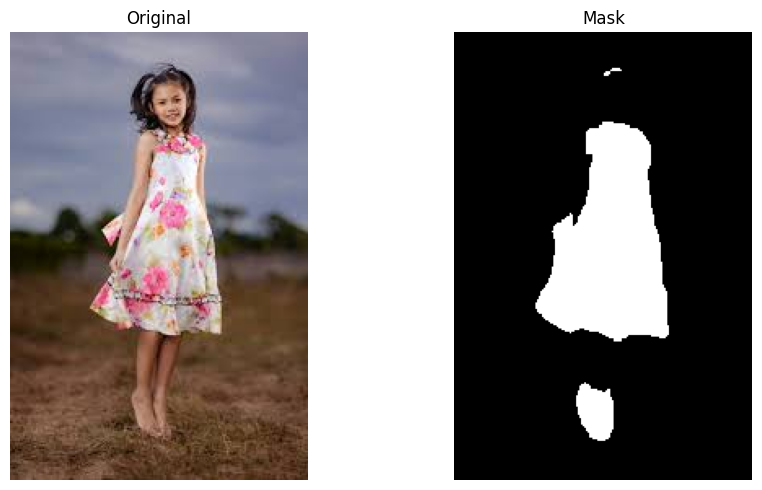

 Saved mask for img2.jpg at /content/masks/img2_mask.png


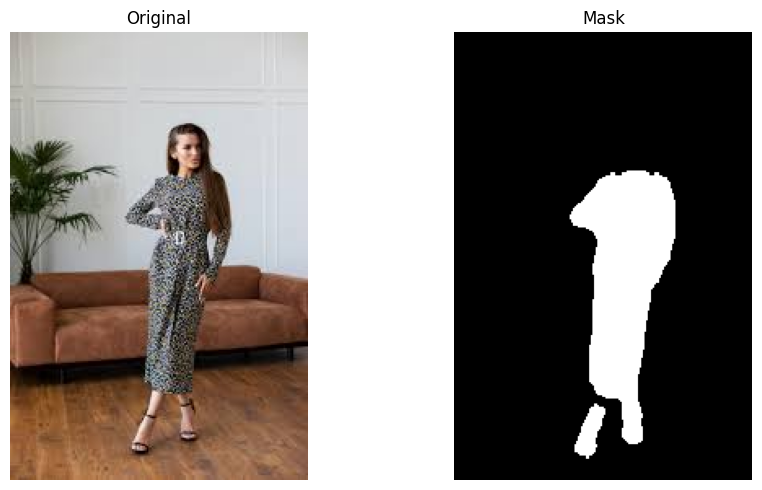

 Saved mask for images.jpg at /content/masks/images_mask.png


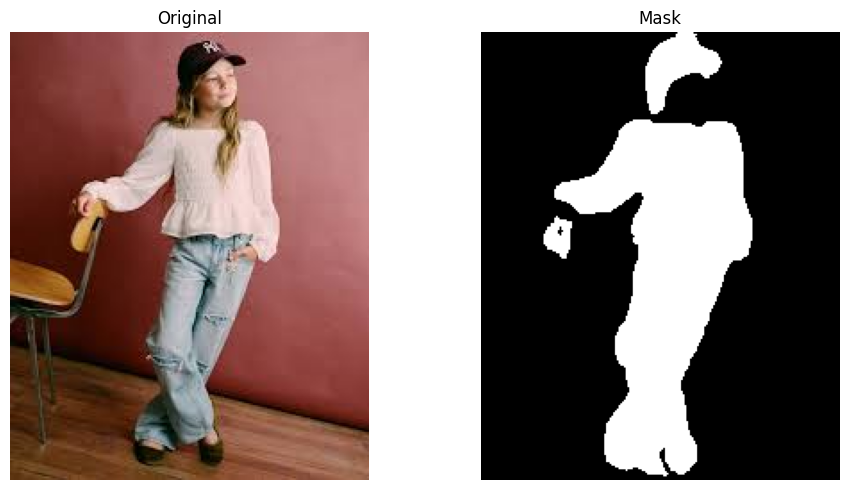

 Saved mask for img7.jpg at /content/masks/img7_mask.png


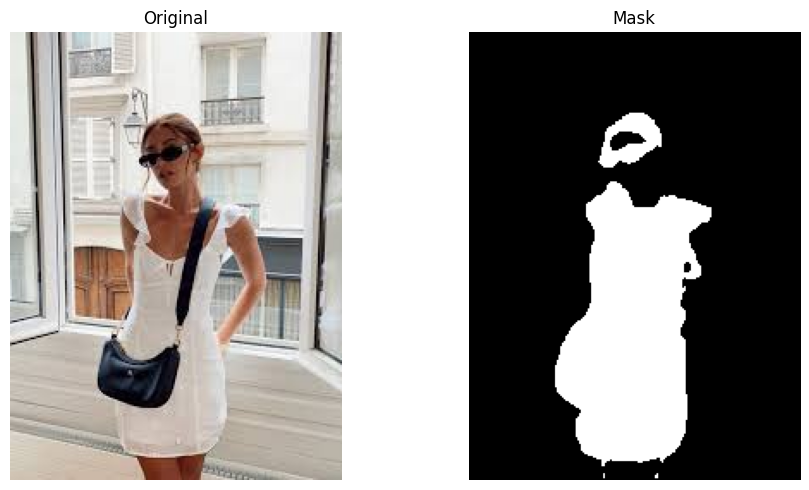

 Saved mask for download.jpg at /content/masks/download_mask.png


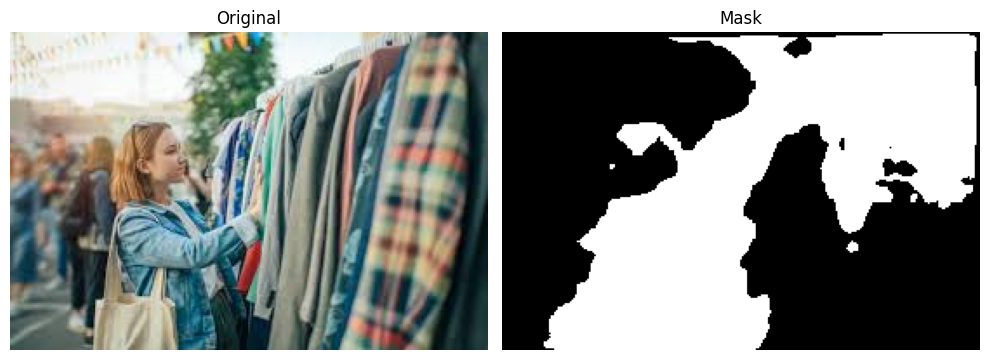

 Saved mask for img55.jpg at /content/masks/img55_mask.png


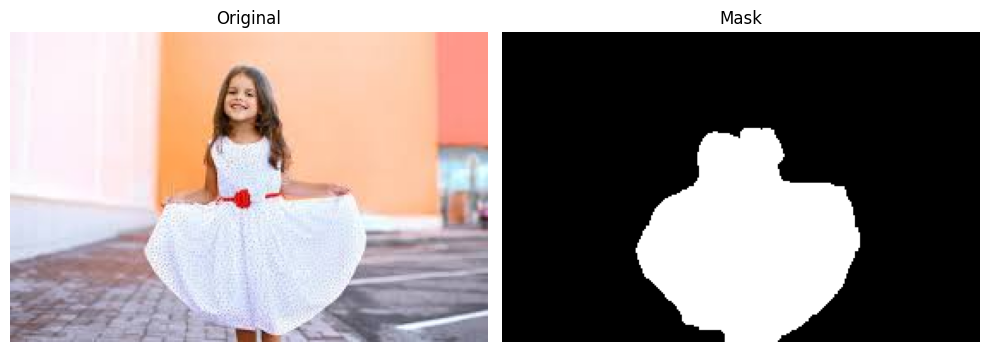

 Saved mask for img6.jpg at /content/masks/img6_mask.png


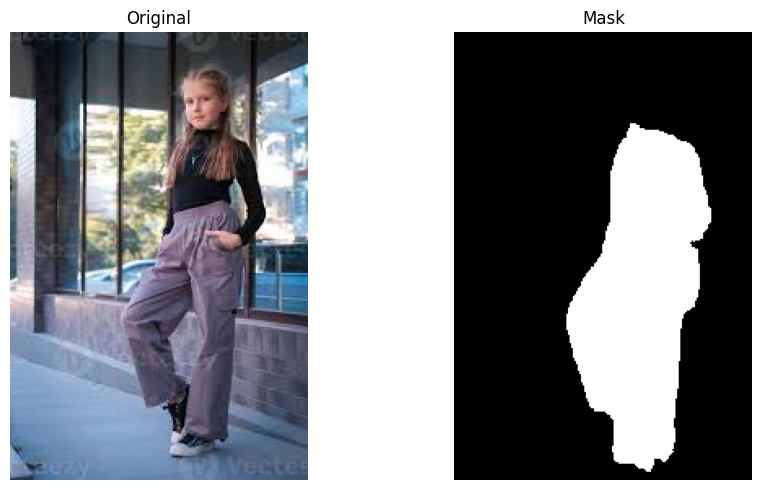

 Saved mask for img3.jpg at /content/masks/img3_mask.png


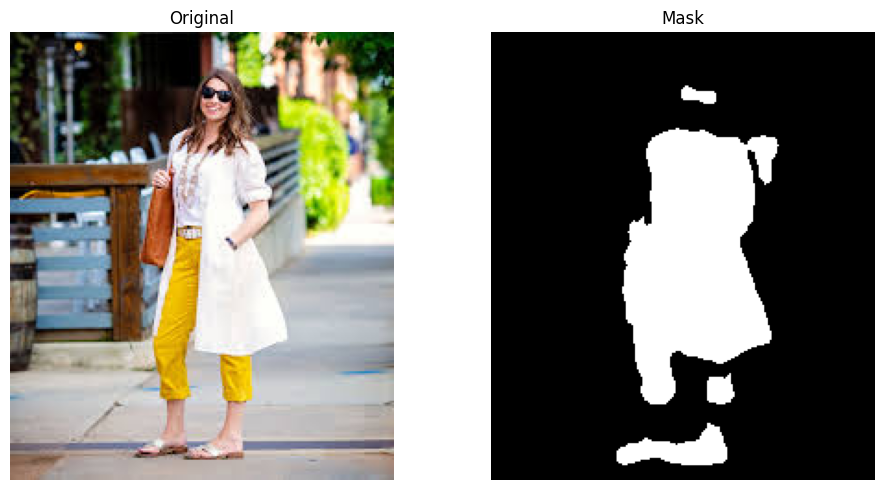

In [8]:
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

import torch
import numpy as np
from PIL import Image
import torchvision.transforms as T
import matplotlib.pyplot as plt
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
image_dir = "/content/images"   # folder containing multiple images
output_dir = "/content/masks"
os.makedirs(output_dir, exist_ok=True)

# Transform for model input
transform = T.Compose([
    T.Resize((256, 256)),
    T.ToTensor(),
])

# Get all images
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir)
               if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

print(f"Found {len(image_paths)} images.")

for img_path in image_paths:
    image = Image.open(img_path).convert("RGB")
    orig_size = image.size

    # Preprocess
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Inference
    with torch.no_grad():
        output = model_Seg(input_tensor)
        output_resized = torch.nn.functional.interpolate(
            output, size=(orig_size[1], orig_size[0]), mode='nearest'
        )

    # Postprocess
    pred_mask = torch.argmax(output_resized, dim=1).squeeze(0).cpu().numpy()
    clothes_classes = list(range(1, 14))
    clothes_mask = np.isin(pred_mask, clothes_classes).astype(np.uint8) * 255

    # Save mask
    mask_img = Image.fromarray(clothes_mask)
    save_path = os.path.join(output_dir, os.path.basename(img_path).replace('.jpg', '_mask.png'))
    mask_img.save(save_path)
    print(f" Saved mask for {os.path.basename(img_path)} at {save_path}")

    # Optional: show image and mask
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(mask_img, cmap="gray")
    plt.title("Mask")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
